first read train and test

In [1]:
import numpy as np

def readfile(fileName):
    X = []
    T = []
    file = open(fileName, 'r')
    line = file.readline().split()
    while len(line):
        X.append([float(line[0]), float(line[1])])
        T.append(int(line[2]))   
        line = file.readline().split()
    return np.array(X), np.array(T)

trainX, trainT = readfile('train')
testX , testT = readfile('test')


visualizing training dataset

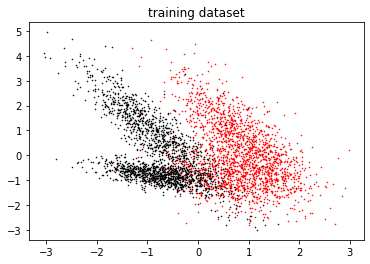

In [2]:
import matplotlib.pylab as plt
for i in range (len(trainT)):
    if trainT[i] == 0:
        plt.scatter(trainX[i][0],trainX[i][1],s=0.3, color ="black")
    elif trainT[i] == 1:
        plt.scatter(trainX[i][0],trainX[i][1],s=0.3, color ="red")

plt.title("training dataset")
plt.show()

In [3]:
from scipy.special import expit #calculate sigmoid function
def derivative_sigmoid(x):
    return x * (1-x)

there are 2 neurons in input layer and 1 neuron in output layer.

i tried 1 layer but it didn't work as well as we need. so i used more layers and more neurons in each layer
in input layer and hidden layers there is a bios

adding more layers didn't help(coused worse ans)



step0: choose random val for weights

In [4]:
import random
neurins = [2, 2, 2, 2 ,1]

w = [np.random.rand(neurins[i], neurins[i + 1]) for i in range(len(neurins) - 1) ]
weights = w

d = [np.zeros((neurins[i], neurins[i + 1])) for i in range(len(neurins) - 1) ]
derivative = d

a = [np.zeros(neurins[i]) for i in range(len(neurins)) ]
active = a


step3:send signal to neurons in the hidden layer

step4:calculate input of hidden layers & active func

step5:calculate input of output layers & active func

step6: calculate delta

step7: updating weights

In [5]:

def forward_propagate(X):
    active[0] = X
    for x1, x2 in enumerate(weights):
        net_X = np.dot(X, x2)
        X = expit(net_X)
        active[x1 + 1] = X
    return active[x1 + 1]

def back_propagate(delta):
    for i in (range(len(derivative)-1,-1,-1)):
        delta *= derivative_sigmoid(active[i+1])
        curr=active[i].reshape(active[i].shape[0],-1)
        derivative[i] = np.dot(curr, delta.reshape(delta.shape[0], -1).T)
        delta = np.dot(delta, weights[i].T)

def gradient_descent():
    for i in range(len(weights)):
        w = weights[i]
        w += derivative[i] * random.uniform(0, 1)

In [6]:
def accuracy():
    a = 0
    for i in range(len(testT)):
        if  forward_propagate(np.array(testX[i]))[0] <0.5:
            ans = 0
        else :
            ans = 1
        if testT[i] == ans :
            a+=1
    return a

step1:do step 2 to 9 until the stop conditions are met

step2:do step 3 to 8 until the stop conditions are met



In [7]:
l = []
for _ in range (100):
     for j, input in enumerate(trainX):
          back_propagate(trainT[j] - forward_propagate(input))
          gradient_descent()
     l.append(accuracy())
print("accuracy:",max(l)/10,"%")


accuracy: 94.0 %
